In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.plot import Plot
from ts.model import GruForecastUnivariate

In [81]:
def tryGruModel(
    targetSeries, 
    exogenousSeries, 
    trainSize,
    seqLength,
    forecastHorizon=1,
    stateSize=10,
    numRnnLayers=1,
    optimizer=tf.optimizers.Adam(0.05),
    numIterations=10
):

    (targetTrain, exoTrain), (targetTest, exoTest) = Utility.trainTestSplitSeries(
        targetSeries=targetSeries,
        exogenousSeries=exogenousSeries,
        train=trainSize
    )

    trainSequences = Utility.breakTrainSeq(
        targetSeries=targetTrain,
        exogenousSeries=exoTrain,
        seqLength=seqLength,
        forecastHorizon=forecastHorizon
    )
    
    numExoVariables = exogenousSeries.shape[1]

    model = GruForecastUnivariate(
        forecastHorizon=forecastHorizon,
        stateSize=stateSize,
        numRnnLayers=numRnnLayers,
        numExoVariables=numExoVariables
    )

    losses = model.train(
        trainSequences=trainSequences,
        numIterations=numIterations,
        optimizer=optimizer
    )
    
    Plot.plotLoss(losses)
    
    testLoss, pred = model.evaluate(
        targetSeries=targetTest,
        exogenousSeries=exoTest[:exoTest.shape[0] - forecastHorizon],
        returnPred=True
    )

    target = targetTest[forecastHorizon:]

    print(target.shape, pred.shape)
    print(testLoss)
    
    Plot.plotPredTrue(pred, target)

# Data 1

In [82]:
dataGen = StandardGenerator('simple')

In [83]:
n = 5000

exoSeq1 = dataGen.generate(n)
exoSeq2 = dataGen.generate(n)
exogenousSeries = np.concatenate(
    (np.expand_dims(exoSeq1, axis=1), np.expand_dims(exoSeq2, axis=1)),
    axis=1
)

targetSeries = exoSeq1 + exoSeq2

print(exogenousSeries.shape, targetSeries.shape)

(5000, 2) (5000,)


Epoch 1/10
8/8 [==============================] - 1s 99ms/step - loss: 3.5028
Epoch 2/10
8/8 [==============================] - 1s 85ms/step - loss: 2.6341
Epoch 3/10
8/8 [==============================] - 1s 83ms/step - loss: 2.3385
Epoch 4/10
8/8 [==============================] - 1s 89ms/step - loss: 2.2342
Epoch 5/10
8/8 [==============================] - 1s 87ms/step - loss: 2.1392
Epoch 6/10
8/8 [==============================] - 1s 84ms/step - loss: 2.0669
Epoch 7/10
8/8 [==============================] - 1s 87ms/step - loss: 2.0753
Epoch 8/10
8/8 [==============================] - 1s 85ms/step - loss: 2.0851
Epoch 9/10
8/8 [==============================] - 1s 83ms/step - loss: 2.0379
Epoch 10/10
8/8 [==============================] - 1s 83ms/step - loss: 2.0059


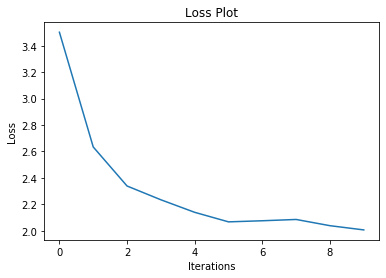

(999,) (999,)
tf.Tensor(1.9838816, shape=(), dtype=float32)


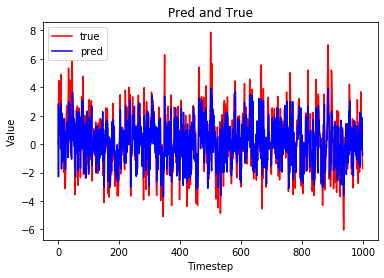

In [85]:
tryGruModel(
    targetSeries, 
    exogenousSeries,
    trainSize=4000,
    seqLength=500,
    forecastHorizon=1
)

# Data 2

In [86]:
dataGen = StandardGenerator('simple')

In [87]:
n = 5000

exoSeq1 = dataGen.generate(n)
exoSeq2 = dataGen.generate(n)
exoSeq3 = dataGen.generate(n)
exoSeq4 = dataGen.generate(n)
exogenousSeries = np.concatenate(
    (
        np.expand_dims(exoSeq1, axis=1), 
        np.expand_dims(exoSeq2, axis=1),
        np.expand_dims(exoSeq3, axis=1),
        np.expand_dims(exoSeq4, axis=1),
    ),
    axis=1
)

targetSeries = exoSeq1 + 2 * exoSeq2 - exoSeq3 + 4 * exoSeq4

print(targetSeries.shape, exogenousSeries.shape)

(5000, 4) (5000,)


Epoch 1/10
8/8 [==============================] - 1s 107ms/step - loss: 37.3492
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 27.4773
Epoch 3/10
8/8 [==============================] - 1s 94ms/step - loss: 26.0030
Epoch 4/10
8/8 [==============================] - 1s 86ms/step - loss: 25.5481
Epoch 5/10
8/8 [==============================] - 1s 88ms/step - loss: 25.0841
Epoch 6/10
8/8 [==============================] - 1s 86ms/step - loss: 24.9351
Epoch 7/10
8/8 [==============================] - 1s 86ms/step - loss: 24.2512
Epoch 8/10
8/8 [==============================] - 1s 91ms/step - loss: 23.8874
Epoch 9/10
8/8 [==============================] - 1s 93ms/step - loss: 23.7631
Epoch 10/10
8/8 [==============================] - 1s 86ms/step - loss: 23.5527


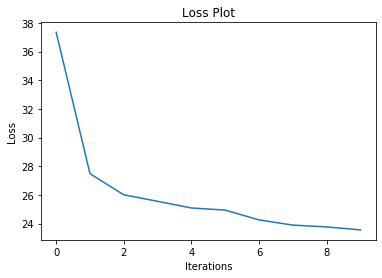

(999,) (999,)
tf.Tensor(24.45797, shape=(), dtype=float32)


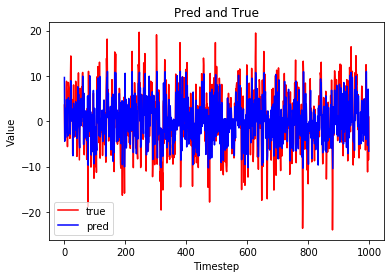

In [88]:
tryGruModel(
    targetSeries, 
    exogenousSeries,
    trainSize=4000,
    seqLength=500,
    forecastHorizon=1
)